In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/Deepfold2


In [3]:
import sys
sys.path.append('bin')

In [4]:
from ViennaRNA import bp_profile, bp_profile_local, unpaired_local

In [5]:
alphabet = np.frombuffer('AUGC', dtype='S1')
s = alphabet[np.random.randint(4, size=400)].tostring()
i, j, p = bp_profile_local(s, window_size=100)

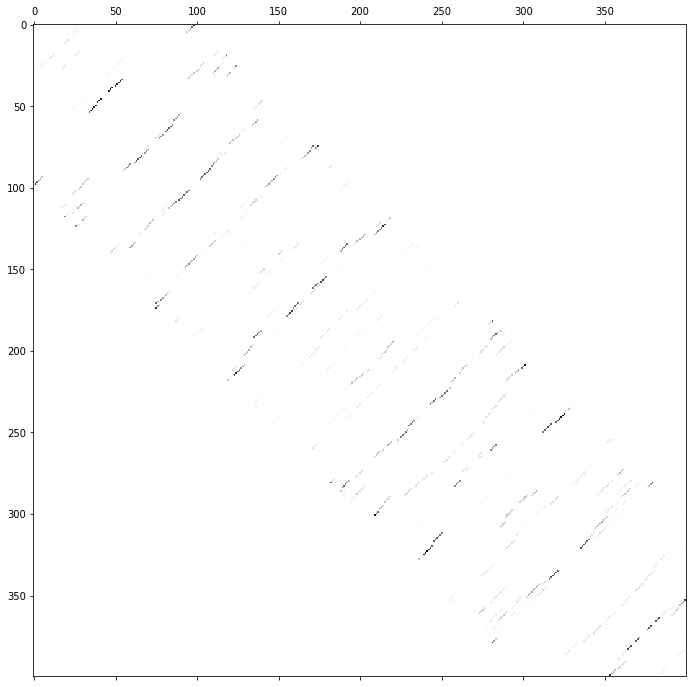

In [6]:
bppm = np.zeros((400, 400))
bppm[i, j] = p
bppm[j, i] = p
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(bppm, cmap=cm.Greys)

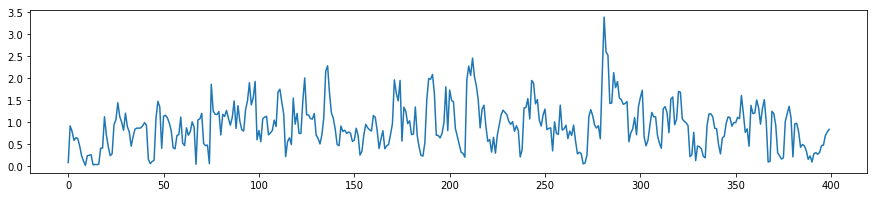

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(bppm.sum(axis=0))

In [8]:
p_s = bp_profile(s)

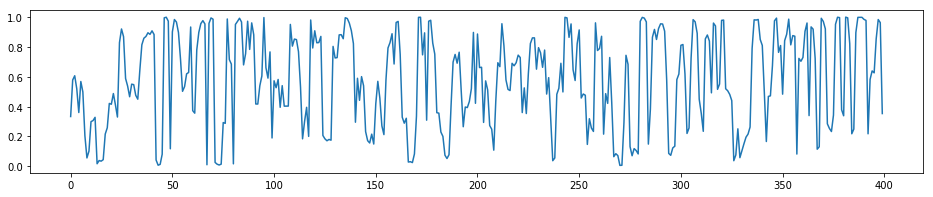

In [17]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(p_s)

In [37]:
up = unpaired_local(s, window_size=400, ulength=1)

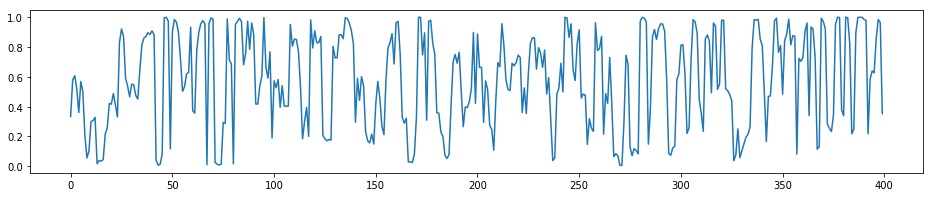

In [40]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot(1.0 - up[:, 0])

In [19]:
from scipy.stats import pearsonr

In [20]:
pearsonr(p_s, bppm.sum(axis=0))

(0.60961697322583019, 4.563859913925546e-42)

In [34]:
print(pearsonr(bppm.sum(axis=0), 1.0 - up[:, 0]))
print(pearsonr(p_s, 1.0 - up[:, 0]))

(0.62817954986404989, 2.6734364177315625e-45)
(0.75725400923020392, 1.22748247570189e-75)
